In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
sales_2017=pd.read_csv(os.path.join(os.getcwd(),'sales2017_raw.csv'),skiprows=2) #skip 2 bea. first 2 null rows
sales_2018=pd.read_csv(os.path.join(os.getcwd(),'sales2018.csv'))
sales_2019=pd.read_csv(os.path.join(os.getcwd(),'sales2019.csv'))
store_cities=pd.read_csv(os.path.join(os.getcwd(),'store_cities.csv'),encoding='latin1')
producthierarchy=pd.read_csv(os.path.join(os.getcwd(),'producthierarchy.csv'))

## Explore Data and Remove Nulls

In [3]:
sales_2017.head()

,order_id (unique),product_id,column3,store_id,order_date,order_date_2,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,delivery_date_format1,delivery_date_format2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,P0258,NaN,S0008,1/2/2017,2-Jan-17,0 sales,0.0,5.0,6.5,PR14,NaN,PR03,NaN,NaN,1/5/2017,5/1/2017
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,P0348,NaN,S0110,1/2/2017,2-Jan-17,0 sales,0.0,9.0,2.1,PR05,verylow,PR03,NaN,NaN,1/4/2017,4/1/2017


In [4]:
# as we see many null colums for most of data so remove it
sales_2017.isna().sum()

order_id (unique)            5
product_id                   7
column3                  18124
store_id                     7
order_date                   7
order_date_2                 7
sales                        7
revenue                      7
stock                        7
price                      631
promo_type_1                 7
promo_bin_1              16131
promo_type_2                 7
promo_bin_2              18124
promo_discount_2         18124
delivery_date_format1        7
delivery_date_format2        7
dtype: int64

In [5]:
sales_2017.drop(['promo_bin_1','promo_bin_2','promo_discount_2','column3'],axis=1,inplace=True)

In [6]:
sales_2017.count()

order_id (unique)        18119
product_id               18117
store_id                 18117
order_date               18117
order_date_2             18117
sales                    18117
revenue                  18117
stock                    18117
price                    17493
promo_type_1             18117
promo_type_2             18117
delivery_date_format1    18117
delivery_date_format2    18117
dtype: int64

In [7]:
#just calc before remove
631/18117

0.03482916597670696

In [8]:
#now we remove null rows and 631/18117  so not affect on whole data less than 1%
#18117 rows 7 nulls in all data after remove
sales_2017.isna().sum()

order_id (unique)          5
product_id                 7
store_id                   7
order_date                 7
order_date_2               7
sales                      7
revenue                    7
stock                      7
price                    631
promo_type_1               7
promo_type_2               7
delivery_date_format1      7
delivery_date_format2      7
dtype: int64

In [9]:
sales_2017.dropna(inplace=True)

In [10]:
#check if we have nulls
sales_2017.isna().sum()

order_id (unique)        0
product_id               0
store_id                 0
order_date               0
order_date_2             0
sales                    0
revenue                  0
stock                    0
price                    0
promo_type_1             0
promo_type_2             0
delivery_date_format1    0
delivery_date_format2    0
dtype: int64

In [11]:
# delivery_date_format2 same as delivery_date_format1 so remove one
# order_date same as order_date_2 so remove one
sales_2017.drop(['delivery_date_format2','order_date_2'],axis=1,inplace=True)
sales_2017.head()

,order_id (unique),product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
1,1.0,P0258,S0008,1/2/2017,0 sales,0.00,5.0,6.50,PR14,PR03,1/5/2017
4,2.0,P0348,S0110,1/2/2017,0 sales,0.00,9.0,2.10,PR05,PR03,1/4/2017
6,3.0,P0219,S0026,1/2/2017,5 sales,33.56,3.0,7.25,PR14,PR03,1/5/2017
7,3.0,P0219,S0026,1/2/2017,5 sales,33.56,3.0,7.25,PR14,PR03,1/5/2017
8,3.0,P0219,S0026,1/2/2017,5 sales,33.56,3.0,7.25,PR14,PR03,1/5/2017


In [12]:
sales_2018.isna().sum()

order_id                     0
product_id                   0
store_id                     0
order_date                   0
order_date_2                 0
sales                        0
revenue                      0
stock                        0
price                     1134
promo_type_1                 0
promo_bin_1              19976
promo_type_2                 0
promo_bin_2              22795
promo_discount_2         22795
delivery_date_format1        0
delivery_date_format2        0
dtype: int64

In [13]:
sales_2018.drop(['promo_bin_1','promo_bin_2','promo_discount_2'],axis=1,inplace=True) #remove null columns
sales_2018.dropna(inplace=True) #remove null rows
sales_2018

,order_id,product_id,store_id,order_date,order_date_2,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1,delivery_date_format2
0,18117,P0129,S0030,1/1/2018,1-Jan-18,0.0,0.00,3.0,24.95,PR14,PR03,1/4/2018,4/1/2018
1,18118,P0513,S0108,1/1/2018,1-Jan-18,0.0,0.00,6.0,15.00,PR14,PR03,1/4/2018,4/1/2018
2,18119,P0229,S0069,1/1/2018,1-Jan-18,0.0,0.00,3.0,7.95,PR14,PR03,1/4/2018,4/1/2018
3,18120,P0275,S0065,1/1/2018,1-Jan-18,0.0,0.00,39.0,2.45,PR14,PR03,1/5/2018,5/1/2018
5,18122,P0448,S0002,1/1/2018,1-Jan-18,1.0,3.75,28.0,4.05,PR14,PR03,1/2/2018,2/1/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,40907,P0739,S0085,12/31/2018,31-Dec-18,0.0,0.00,139.0,7.90,PR14,PR03,1/2/2019,2/1/2019
22791,40908,P0673,S0043,12/31/2018,31-Dec-18,0.0,0.00,1.0,4.00,PR14,PR03,1/4/2019,4/1/2019
22792,40909,P0733,S0129,12/31/2018,31-Dec-18,0.0,0.00,6.0,0.50,PR14,PR03,1/4/2019,4/1/2019
22793,40910,P0333,S0018,12/31/2018,31-Dec-18,0.0,0.00,19.0,2.95,PR14,PR03,1/4/2019,4/1/2019


In [14]:
sales_2018.drop(['delivery_date_format2','order_date_2'],axis=1,inplace=True)
sales_2018.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
0,18117,P0129,S0030,1/1/2018,0.0,0.00,3.0,24.95,PR14,PR03,1/4/2018
1,18118,P0513,S0108,1/1/2018,0.0,0.00,6.0,15.00,PR14,PR03,1/4/2018
2,18119,P0229,S0069,1/1/2018,0.0,0.00,3.0,7.95,PR14,PR03,1/4/2018
3,18120,P0275,S0065,1/1/2018,0.0,0.00,39.0,2.45,PR14,PR03,1/5/2018
5,18122,P0448,S0002,1/1/2018,1.0,3.75,28.0,4.05,PR14,PR03,1/2/2018


In [15]:
sales_2019.isna().sum()

order_id                     0
product_id                   0
store_id                     0
order_date                   0
order_date_2                 0
sales                     8130
revenue                   8130
stock                     8130
price                      356
promo_type_1                 0
promo_bin_1              39258
promo_type_2                 0
promo_bin_2              46859
promo_discount_2         46859
delivery_date_format1        0
delivery_date_format2        0
dtype: int64

In [16]:
sales_2019.drop(['promo_bin_1','promo_bin_2','promo_discount_2'],axis=1,inplace=True) #remove null columns
sales_2019.dropna(inplace=True) #remove null rows
sales_2019.drop(['delivery_date_format2','order_date_2'],axis=1,inplace=True)#remove duplicate colums
sales_2019.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
0,40911,P0392,S0001,1/1/2019,0.0,0.00,3.0,124.99,PR14,PR03,1/3/2019
1,40912,P0018,S0071,1/1/2019,0.0,0.00,4.0,3.25,PR03,PR03,1/3/2019
2,40913,P0565,S0096,1/1/2019,0.0,0.00,12.0,4.25,PR14,PR03,1/4/2019
3,40914,P0372,S0121,1/1/2019,0.0,0.00,24.0,4.90,PR14,PR03,1/3/2019
4,40915,P0543,S0101,1/1/2019,2.0,7.41,11.0,4.00,PR14,PR03,1/5/2019


In [17]:
# have no nulls
store_cities.isna().sum()

store_id                    0
storetype_id                0
store_szie                  0
city_id                     0
state - state abr - city    0
lat / long                  0
dtype: int64

In [18]:
store_cities

,store_id,storetype_id,store_szie,city_id,state - state abr - city,lat / long
0,S0091,ST04,19 m²,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685
1,S0012,ST04,28 m²,C005,TX - Texas - Huntsville,30.7813 / -95.5953
2,S0045,ST04,17 qm,C008,NC - North Carolina - Asheville,35.6004 / -82.4918
3,S0032,ST03,14 m²,C019,CA - California - Los Angeles,33.7866 / -118.2987
4,S0027,ST04,24 qm,C022,TX - Texas - Texarkana,33.3934 / -94.3404
...,...,...,...,...,...,...
139,S0013,ST04,33 qm,C026,TX - Texas - Katy,29.8678 / -95.8298
140,S0118,ST03,20 qm,C023,CO - Colorado - Denver,39.7388 / -104.4083
141,S0042,ST04,25 qm,C020,OH - Ohio - Dayton,39.7617 / -84.1498
142,S0086,ST03,12 qm,C003,TX - Texas - El Paso,31.6948 / -106.3


In [19]:
store_cities[['size','unit']]=store_cities['store_szie'].str.split(' ',expand=True)
store_cities

,store_id,storetype_id,store_szie,city_id,state - state abr - city,lat / long,size,unit
0,S0091,ST04,19 m²,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685,19,m²
1,S0012,ST04,28 m²,C005,TX - Texas - Huntsville,30.7813 / -95.5953,28,m²
2,S0045,ST04,17 qm,C008,NC - North Carolina - Asheville,35.6004 / -82.4918,17,qm
3,S0032,ST03,14 m²,C019,CA - California - Los Angeles,33.7866 / -118.2987,14,m²
4,S0027,ST04,24 qm,C022,TX - Texas - Texarkana,33.3934 / -94.3404,24,qm
...,...,...,...,...,...,...,...,...
139,S0013,ST04,33 qm,C026,TX - Texas - Katy,29.8678 / -95.8298,33,qm
140,S0118,ST03,20 qm,C023,CO - Colorado - Denver,39.7388 / -104.4083,20,qm
141,S0042,ST04,25 qm,C020,OH - Ohio - Dayton,39.7617 / -84.1498,25,qm
142,S0086,ST03,12 qm,C003,TX - Texas - El Paso,31.6948 / -106.3,12,qm


In [20]:
#see all unique units before make any action
store_cities['unit'].unique()

array(['m²', 'qm'], dtype=object)

In [21]:
# decide to make all units same in m²

conversion_factors = {'m²': 1,'qm': 0.01}

store_cities['unit']=store_cities['unit'].map(conversion_factors)

store_cities['size']=store_cities['size'].astype('int32')


store_cities


,store_id,storetype_id,store_szie,city_id,state - state abr - city,lat / long,size,unit
0,S0091,ST04,19 m²,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685,19,1.00
1,S0012,ST04,28 m²,C005,TX - Texas - Huntsville,30.7813 / -95.5953,28,1.00
2,S0045,ST04,17 qm,C008,NC - North Carolina - Asheville,35.6004 / -82.4918,17,0.01
3,S0032,ST03,14 m²,C019,CA - California - Los Angeles,33.7866 / -118.2987,14,1.00
4,S0027,ST04,24 qm,C022,TX - Texas - Texarkana,33.3934 / -94.3404,24,0.01
...,...,...,...,...,...,...,...,...
139,S0013,ST04,33 qm,C026,TX - Texas - Katy,29.8678 / -95.8298,33,0.01
140,S0118,ST03,20 qm,C023,CO - Colorado - Denver,39.7388 / -104.4083,20,0.01
141,S0042,ST04,25 qm,C020,OH - Ohio - Dayton,39.7617 / -84.1498,25,0.01
142,S0086,ST03,12 qm,C003,TX - Texas - El Paso,31.6948 / -106.3,12,0.01


In [22]:
store_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  144 non-null    object 
 1   storetype_id              144 non-null    object 
 2   store_szie                144 non-null    object 
 3   city_id                   144 non-null    object 
 4   state - state abr - city  144 non-null    object 
 5   lat / long                144 non-null    object 
 6   size                      144 non-null    int32  
 7   unit                      144 non-null    float64
dtypes: float64(1), int32(1), object(6)
memory usage: 8.6+ KB


In [23]:
#we get final size 
store_cities['size_final']=store_cities['unit']*store_cities['size']
store_cities

,store_id,storetype_id,store_szie,city_id,state - state abr - city,lat / long,size,unit,size_final
0,S0091,ST04,19 m²,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685,19,1.00,19.00
1,S0012,ST04,28 m²,C005,TX - Texas - Huntsville,30.7813 / -95.5953,28,1.00,28.00
2,S0045,ST04,17 qm,C008,NC - North Carolina - Asheville,35.6004 / -82.4918,17,0.01,0.17
3,S0032,ST03,14 m²,C019,CA - California - Los Angeles,33.7866 / -118.2987,14,1.00,14.00
4,S0027,ST04,24 qm,C022,TX - Texas - Texarkana,33.3934 / -94.3404,24,0.01,0.24
...,...,...,...,...,...,...,...,...,...
139,S0013,ST04,33 qm,C026,TX - Texas - Katy,29.8678 / -95.8298,33,0.01,0.33
140,S0118,ST03,20 qm,C023,CO - Colorado - Denver,39.7388 / -104.4083,20,0.01,0.20
141,S0042,ST04,25 qm,C020,OH - Ohio - Dayton,39.7617 / -84.1498,25,0.01,0.25
142,S0086,ST03,12 qm,C003,TX - Texas - El Paso,31.6948 / -106.3,12,0.01,0.12


In [24]:
#remove unwanted colums

store_cities.drop(['store_szie','size','unit'],axis=1,inplace=True)

store_cities

,store_id,storetype_id,city_id,state - state abr - city,lat / long,size_final
0,S0091,ST04,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685,19.00
1,S0012,ST04,C005,TX - Texas - Huntsville,30.7813 / -95.5953,28.00
2,S0045,ST04,C008,NC - North Carolina - Asheville,35.6004 / -82.4918,0.17
3,S0032,ST03,C019,CA - California - Los Angeles,33.7866 / -118.2987,14.00
4,S0027,ST04,C022,TX - Texas - Texarkana,33.3934 / -94.3404,0.24
...,...,...,...,...,...,...
139,S0013,ST04,C026,TX - Texas - Katy,29.8678 / -95.8298,0.33
140,S0118,ST03,C023,CO - Colorado - Denver,39.7388 / -104.4083,0.20
141,S0042,ST04,C020,OH - Ohio - Dayton,39.7617 / -84.1498,0.25
142,S0086,ST03,C003,TX - Texas - El Paso,31.6948 / -106.3,0.12


In [25]:
#check null for producthierarchy
producthierarchy.isna().sum()

product_id                         0
product (brand)                    0
type                               0
length x depth x width (in cm)    16
category || sub_category           0
dtype: int64

In [26]:
#remove na
producthierarchy.dropna(inplace=True)
producthierarchy.head()

,product_id,product (brand),type,length x depth x width (in cm),category || sub_category
0,P0000,\tserum\t (Livon),Indian & Exotic Herbs,5 x 20 x 12,Fruits & Vegetables || Herbs & Seasonings
1,P0001,hand wash -\t moisture Shield (Savlon),Hair Oil & Serum,13.5 x 22 x 20,Beauty & Hygiene || Hair Care
2,P0002,good \t\tday butter Cookies (Britannia),Hand Wash & Sanitizers,22 x 40 x 22,Beauty & Hygiene || Bath & Hand Wash
3,P0004,Happy \t\tHappy Choco-Chip Cookies (Parle),Cookies,2 x 13 x 4,Snacks & Branded Foods || Biscuits & Cookies
4,P0005,50-50 Timepass salted biscuits (Britannia),Glucose & Milk Biscuits,16 x 30 x 16,Snacks & Branded Foods || Biscuits & Cookies


In [27]:
#i want to get volume instead of 5x20x12 
producthierarchy['length x depth x width (in cm)']=producthierarchy['length x depth x width (in cm)'].str.replace(' ', '')
producthierarchy[['len','depth','width']]=producthierarchy['length x depth x width (in cm)'].str.split('x', expand=True)
producthierarchy

,product_id,product (brand),type,length x depth x width (in cm),category || sub_category,len,depth,width
0,P0000,\tserum\t (Livon),Indian & Exotic Herbs,5x20x12,Fruits & Vegetables || Herbs & Seasonings,5,20,12
1,P0001,hand wash -\t moisture Shield (Savlon),Hair Oil & Serum,13.5x22x20,Beauty & Hygiene || Hair Care,13.5,22,20
2,P0002,good \t\tday butter Cookies (Britannia),Hand Wash & Sanitizers,22x40x22,Beauty & Hygiene || Bath & Hand Wash,22,40,22
3,P0004,Happy \t\tHappy Choco-Chip Cookies (Parle),Cookies,2x13x4,Snacks & Branded Foods || Biscuits & Cookies,2,13,4
4,P0005,50-50 Timepass salted biscuits (Britannia),Glucose & Milk Biscuits,16x30x16,Snacks & Branded Foods || Biscuits & Cookies,16,30,16
...,...,...,...,...,...,...,...,...
693,P0742,Coke Zero Soft Drink - No Sugar (Coca-Cola),Cream Biscuits & Wafers,6.4x7x6.4,Snacks & Branded Foods || Biscuits & Cookies,6.4,7,6.4
694,P0744,Bleaching Powder - Strong (Zermisol),Cold Drinks,2x7x7,Beverages || Energy & Soft Drinks,2,7,7
696,P0746,Haldi Chandan Soap (Jiva Ayurveda),Rice & Other Flours,1x1x1,"Foodgrains, Oil & Masala || Atta, Flours & Sooji",1,1,1
697,P0747,Pure Magic Deuce Vanilla Biscuits (Britannia),Bathing Bars & Soaps,23x23x33.3,Beauty & Hygiene || Bath & Hand Wash,23,23,33.3


In [28]:
producthierarchy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   product_id                      683 non-null    object
 1   product (brand)                 683 non-null    object
 2   type                            683 non-null    object
 3   length x depth x width (in cm)  683 non-null    object
 4   category || sub_category        683 non-null    object
 5   len                             683 non-null    object
 6   depth                           683 non-null    object
 7   width                           681 non-null    object
dtypes: object(8)
memory usage: 48.0+ KB


In [29]:
#change type for multiply
#we have 2 rows null in width 
producthierarchy=producthierarchy.astype({'len': 'float32', 'depth': 'float32', 'width': 'float32'})
producthierarchy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      683 non-null    object 
 1   product (brand)                 683 non-null    object 
 2   type                            683 non-null    object 
 3   length x depth x width (in cm)  683 non-null    object 
 4   category || sub_category        683 non-null    object 
 5   len                             683 non-null    float32
 6   depth                           683 non-null    float32
 7   width                           681 non-null    float32
dtypes: float32(3), object(5)
memory usage: 40.0+ KB


In [30]:
# we have data missing width data bea of [length x depth x width (in cm)] it missing in it so remove it
producthierarchy[producthierarchy['width'].isna()]

,product_id,product (brand),type,length x depth x width (in cm),category || sub_category,len,depth,width
53,P0056,Salt/Uppu - Iodised (Aashirvaad),Chips & Corn Snacks,12x10,Snacks & Branded Foods || Snacks & Namkeen,12.0,10.0,NaN
577,P0617,Chicken Tandoori Masala (bb Royal),Powdered Spices,35x35,"Foodgrains, Oil & Masala || Masalas & Spices",35.0,35.0,NaN


In [31]:
#remove null in width 

producthierarchy.dropna(inplace=True)

#now combine 3 colums ['len','width','depth'] to get volume
producthierarchy['volume'] =( producthierarchy['len']
                             * producthierarchy['width'] *
                             producthierarchy['depth'])


# remove unwanted colums like ['length x depth x width (in cm)','len','depth','width]
producthierarchy.drop(['length x depth x width (in cm)','len','depth','width'],axis=1,inplace=True)



producthierarchy.head()

,product_id,product (brand),type,category || sub_category,volume
0,P0000,\tserum\t (Livon),Indian & Exotic Herbs,Fruits & Vegetables || Herbs & Seasonings,1200.0
1,P0001,hand wash -\t moisture Shield (Savlon),Hair Oil & Serum,Beauty & Hygiene || Hair Care,5940.0
2,P0002,good \t\tday butter Cookies (Britannia),Hand Wash & Sanitizers,Beauty & Hygiene || Bath & Hand Wash,19360.0
3,P0004,Happy \t\tHappy Choco-Chip Cookies (Parle),Cookies,Snacks & Branded Foods || Biscuits & Cookies,104.0
4,P0005,50-50 Timepass salted biscuits (Britannia),Glucose & Milk Biscuits,Snacks & Branded Foods || Biscuits & Cookies,7680.0


## customize colums to concat and also handle data inside

In [32]:
sales_2017.head(1)


,order_id (unique),product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
1,1.0,P0258,S0008,1/2/2017,0 sales,0.0,5.0,6.5,PR14,PR03,1/5/2017


In [33]:
sales_2018.head(1)

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
0,18117,P0129,S0030,1/1/2018,0.0,0.0,3.0,24.95,PR14,PR03,1/4/2018


In [34]:
#colums same for all but want to remove sales beside 0 
#also order_id should be same
sales_2017['sales']=sales_2017['sales'].str.split(' ').str[0]
sales_2017.rename(columns={'order_id (unique)': 'order_id'}, inplace=True)
sales_2017['sales']=sales_2017['sales'].astype('float32')
sales_2017.head(1)

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
1,1.0,P0258,S0008,1/2/2017,0.0,0.0,5.0,6.5,PR14,PR03,1/5/2017


In [35]:
#concat all sales colums in one
#REMOVE dupilactes in order _id

sales_final = pd.concat([sales_2017, sales_2018, sales_2019], axis=0)
sales_final = sales_final.drop_duplicates(subset='order_id')

#change type of all id for something later
sales_final['order_id'] = sales_final['order_id'].astype(int)
sales_final

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_type_2,delivery_date_format1
1,1,P0258,S0008,1/2/2017,0.0,0.00,5.0,6.50,PR14,PR03,1/5/2017
4,2,P0348,S0110,1/2/2017,0.0,0.00,9.0,2.10,PR05,PR03,1/4/2017
6,3,P0219,S0026,1/2/2017,5.0,33.56,3.0,7.25,PR14,PR03,1/5/2017
10,4,P0218,S0051,1/2/2017,0.0,0.00,1.0,59.90,PR05,PR03,1/4/2017
11,5,P0660,S0056,1/2/2017,1.0,4.58,5.0,4.95,PR14,PR03,1/4/2017
...,...,...,...,...,...,...,...,...,...,...,...
43169,84080,P0395,S0072,10/31/2019,0.0,0.00,6.0,37.50,PR14,PR03,11/3/2019
43170,84081,P0063,S0008,10/31/2019,0.0,0.00,25.0,5.90,PR14,PR03,11/4/2019
43171,84082,P0423,S0012,10/31/2019,0.0,0.00,1.0,0.50,PR14,PR03,11/2/2019
43172,84083,P0543,S0065,10/31/2019,1.0,3.70,14.0,4.00,PR14,PR03,11/1/2019


In [36]:
# extract month and year from date

#for order_date
sales_final['order_date'] = pd.to_datetime(sales_final['order_date'], format='%m/%d/%Y')
sales_final['order_month'] = sales_final['order_date'].dt.month
sales_final['order_year'] = sales_final['order_date'].dt.year

#for delivery_date_format1
sales_final['delivery_date_format1'] = pd.to_datetime(sales_final['delivery_date_format1'], format='%m/%d/%Y')
sales_final['delivery_month'] = sales_final['delivery_date_format1'].dt.month
sales_final['delivery_year'] = sales_final['delivery_date_format1'].dt.year

#remove colums after extract features 

sales_final.drop(['order_date','delivery_date_format1'],inplace=True,axis=1)

sales_final

,order_id,product_id,store_id,sales,revenue,stock,price,promo_type_1,promo_type_2,order_month,order_year,delivery_month,delivery_year
1,1,P0258,S0008,0.0,0.00,5.0,6.50,PR14,PR03,1,2017,1,2017
4,2,P0348,S0110,0.0,0.00,9.0,2.10,PR05,PR03,1,2017,1,2017
6,3,P0219,S0026,5.0,33.56,3.0,7.25,PR14,PR03,1,2017,1,2017
10,4,P0218,S0051,0.0,0.00,1.0,59.90,PR05,PR03,1,2017,1,2017
11,5,P0660,S0056,1.0,4.58,5.0,4.95,PR14,PR03,1,2017,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43169,84080,P0395,S0072,0.0,0.00,6.0,37.50,PR14,PR03,10,2019,11,2019
43170,84081,P0063,S0008,0.0,0.00,25.0,5.90,PR14,PR03,10,2019,11,2019
43171,84082,P0423,S0012,0.0,0.00,1.0,0.50,PR14,PR03,10,2019,11,2019
43172,84083,P0543,S0065,1.0,3.70,14.0,4.00,PR14,PR03,10,2019,11,2019


In [37]:
#check store_cities
store_cities.head(2)

,store_id,storetype_id,city_id,state - state abr - city,lat / long,size_final
0,S0091,ST04,C013,AR - Arkansas - Hot Springs National Park,34.5137 / -92.9685,19.0
1,S0012,ST04,C005,TX - Texas - Huntsville,30.7813 / -95.5953,28.0


In [38]:
#split colums by state - state abr - city	
store_cities['state - state abr - city']=store_cities['state - state abr - city'].replace(' ','')
store_cities[['state abr','state','city']]=store_cities['state - state abr - city'].str.split('-',expand=True)
store_cities.head(2)

#split long/lat

store_cities['lat / long']=store_cities['lat / long'].replace(' ','')
store_cities[['lat', 'long']] = store_cities['lat / long'].str.split(' / ', expand=True)

#remove unwated colums after extract feature from it 

store_cities.drop(['lat / long','state - state abr - city'],axis=1,inplace=True)

store_cities.head(1)


,store_id,storetype_id,city_id,size_final,state abr,state,city,lat,long
0,S0091,ST04,C013,19.0,AR,Arkansas,Hot Springs National Park,34.5137,-92.9685


In [39]:
#see the producthierarchy
producthierarchy.head(3)

,product_id,product (brand),type,category || sub_category,volume
0,P0000,\tserum\t (Livon),Indian & Exotic Herbs,Fruits & Vegetables || Herbs & Seasonings,1200.0
1,P0001,hand wash -\t moisture Shield (Savlon),Hair Oil & Serum,Beauty & Hygiene || Hair Care,5940.0
2,P0002,good \t\tday butter Cookies (Britannia),Hand Wash & Sanitizers,Beauty & Hygiene || Bath & Hand Wash,19360.0


In [40]:
#split category and sub_category

producthierarchy['category || sub_category'] = producthierarchy['category || sub_category'].str.replace(' || ', '.')
producthierarchy[['categoryy', 'sub_categoryy']] = producthierarchy['category || sub_category'].str.split('.', expand=True)
producthierarchy.drop('category || sub_category',inplace=True,axis=1)
#also take brand 
regex_pattern = r'\(([^)]+)\)'
producthierarchy['brand']=producthierarchy['product (brand)'].str.extract(regex_pattern)
producthierarchy.drop('product (brand)',axis=1,inplace=True)
#round volume also 
producthierarchy['volume']=producthierarchy['volume'].round(0)

#remove colums after extract features 


producthierarchy

,product_id,type,volume,categoryy,sub_categoryy,brand
0,P0000,Indian & Exotic Herbs,1200.0,Fruits & Vegetables,Herbs & Seasonings,Livon
1,P0001,Hair Oil & Serum,5940.0,Beauty & Hygiene,Hair Care,Savlon
2,P0002,Hand Wash & Sanitizers,19360.0,Beauty & Hygiene,Bath & Hand Wash,Britannia
3,P0004,Cookies,104.0,Snacks & Branded Foods,Biscuits & Cookies,Parle
4,P0005,Glucose & Milk Biscuits,7680.0,Snacks & Branded Foods,Biscuits & Cookies,Britannia
...,...,...,...,...,...,...
693,P0742,Cream Biscuits & Wafers,287.0,Snacks & Branded Foods,Biscuits & Cookies,Coca-Cola
694,P0744,Cold Drinks,98.0,Beverages,Energy & Soft Drinks,Zermisol
696,P0746,Rice & Other Flours,1.0,"Foodgrains, Oil & Masala","Atta, Flours & Sooji",Jiva Ayurveda
697,P0747,Bathing Bars & Soaps,17616.0,Beauty & Hygiene,Bath & Hand Wash,Britannia


## visualization to data

In [41]:
[sales_final.columns,producthierarchy.columns,
store_cities.columns]

[Index(['order_id', 'product_id', 'store_id', 'sales', 'revenue', 'stock',
        'price', 'promo_type_1', 'promo_type_2', 'order_month', 'order_year',
        'delivery_month', 'delivery_year'],
       dtype='object'),
 Index(['product_id', 'type', 'volume', 'categoryy', 'sub_categoryy', 'brand'], dtype='object'),
 Index(['store_id', 'storetype_id', 'city_id', 'size_final', 'state abr',
        'state', 'city', 'lat', 'long'],
       dtype='object')]

In [42]:
month_revenue=sales_final[['revenue','order_month']].groupby('order_month').sum().sort_values(by='revenue', ascending=False).reset_index()
month_revenue

,order_month,revenue
0,8,27781.17
1,9,17338.57
2,10,17054.17
3,5,16336.37
4,7,15688.43
5,6,14184.39
6,3,12686.48
7,2,12294.68
8,4,11754.28
9,1,7904.00


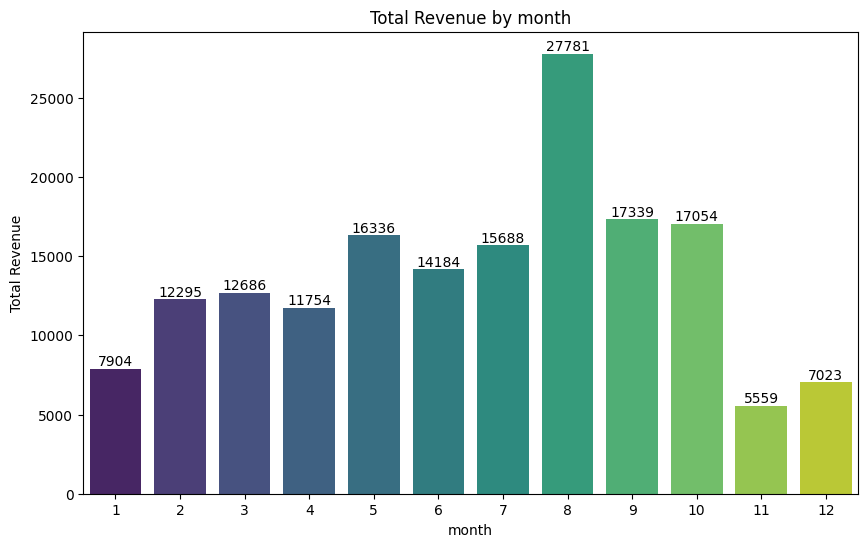

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='order_month', y='revenue', data=month_revenue, palette='viridis')

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set plot titles and labels
plt.title('Total Revenue by month')
plt.xlabel('month')
plt.ylabel('Total Revenue')
plt.show()

In [44]:
year_revenue=sales_final[['revenue','order_year']].groupby('order_year').sum().sort_values(by='revenue', ascending=False).reset_index()
year_revenue

,order_year,revenue
0,2019,93357.31
1,2018,43071.32
2,2017,29175.90


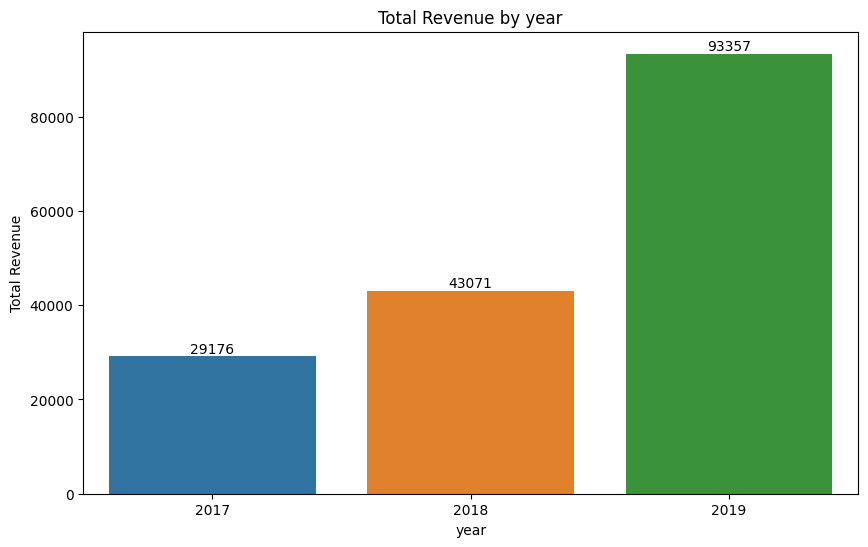

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='order_year', y='revenue', data=year_revenue)

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set plot titles and labels
plt.title('Total Revenue by year')
plt.xlabel('year')
plt.ylabel('Total Revenue')
plt.show()

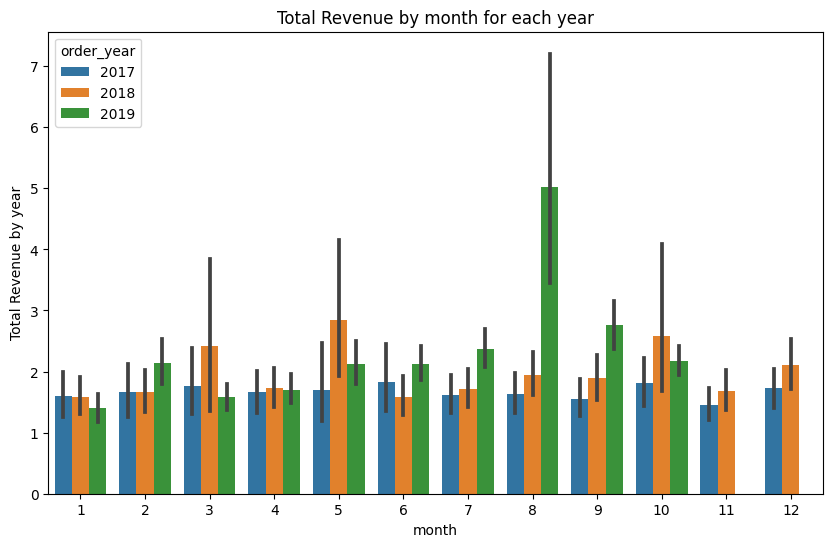

In [46]:
plt.figure(figsize=(10, 6))

sns.barplot(x='order_month', y='revenue', data=sales_final,hue='order_year')

# Add val
# Set plot titles and labels
plt.title('Total Revenue by month for each year')
plt.xlabel('month')
plt.ylabel('Total Revenue by year')
plt.show()

In [47]:
#make_inner_join for some visualize
sales_to_stores= pd.merge(sales_final, store_cities, on=['store_id', 'store_id'], how='inner')
sales_to_stores.head(1)

,order_id,product_id,store_id,sales,revenue,stock,price,promo_type_1,promo_type_2,order_month,...,delivery_month,delivery_year,storetype_id,city_id,size_final,state abr,state,city,lat,long
0,1,P0258,S0008,0.0,0.0,5.0,6.5,PR14,PR03,1,...,1,2017,ST04,C024,0.27,OK,Oklahoma,Oklahoma City,35.5514,-97.4075


In [48]:
state_revenue=sales_to_stores[['revenue','state']].groupby('state').sum().sort_values(by='revenue', ascending=False).reset_index()
state_revenue.head(5)

,state,revenue
0,Texas,21465.97
1,Oklahoma,16521.86
2,Ohio,14901.96
3,Arizona,12924.08
4,Missouri,12880.07


In [49]:
product_to_stores= pd.merge(sales_final, producthierarchy, on=['product_id', 'product_id'], how='inner')
product_to_stores.head(5)

,order_id,product_id,store_id,sales,revenue,stock,price,promo_type_1,promo_type_2,order_month,order_year,delivery_month,delivery_year,type,volume,categoryy,sub_categoryy,brand
0,1,P0258,S0008,0.0,0.0,5.0,6.5,PR14,PR03,1,2017,1,2017,Shower Gel & Body Wash,1482.0,Beauty & Hygiene,Bath & Hand Wash,Sunfeast
1,271,P0258,S0026,0.0,0.0,11.0,6.5,PR14,PR03,1,2017,1,2017,Shower Gel & Body Wash,1482.0,Beauty & Hygiene,Bath & Hand Wash,Sunfeast
2,636,P0258,S0142,0.0,0.0,11.0,6.5,PR14,PR03,1,2017,1,2017,Shower Gel & Body Wash,1482.0,Beauty & Hygiene,Bath & Hand Wash,Sunfeast
3,924,P0258,S0023,0.0,0.0,8.0,6.5,PR14,PR03,1,2017,1,2017,Shower Gel & Body Wash,1482.0,Beauty & Hygiene,Bath & Hand Wash,Sunfeast
4,1295,P0258,S0138,0.0,0.0,16.0,6.5,PR14,PR03,1,2017,2,2017,Shower Gel & Body Wash,1482.0,Beauty & Hygiene,Bath & Hand Wash,Sunfeast


In [50]:
subcategory_revenue=product_to_stores[['revenue','sub_categoryy']].groupby('sub_categoryy').sum().sort_values(by='revenue', ascending=False).reset_index()
subcategory_revenue.head(5)

,sub_categoryy,revenue
0,Snacks & Namkeen,19842.46
1,Biscuits & Cookies,15078.11
2,Fresh Vegetables,14583.69
3,Chocolates & Candies,13695.38
4,Organic Fruits & Vegetables,13313.87


In [ ]:
category_revenue=product_to_stores[['revenue','categoryy']].groupby('categoryy').sum().sort_values(by='revenue', ascending=False).reset_index()
category_revenue.head(5)

,categoryy,revenue
0,Snacks & Branded Foods,58383.14
1,Fruits & Vegetables,35755.19
2,Beauty & Hygiene,19272.77
3,"Foodgrains, Oil & Masala",14562.93
4,"Bakery, Cakes & Dairy",10364.81


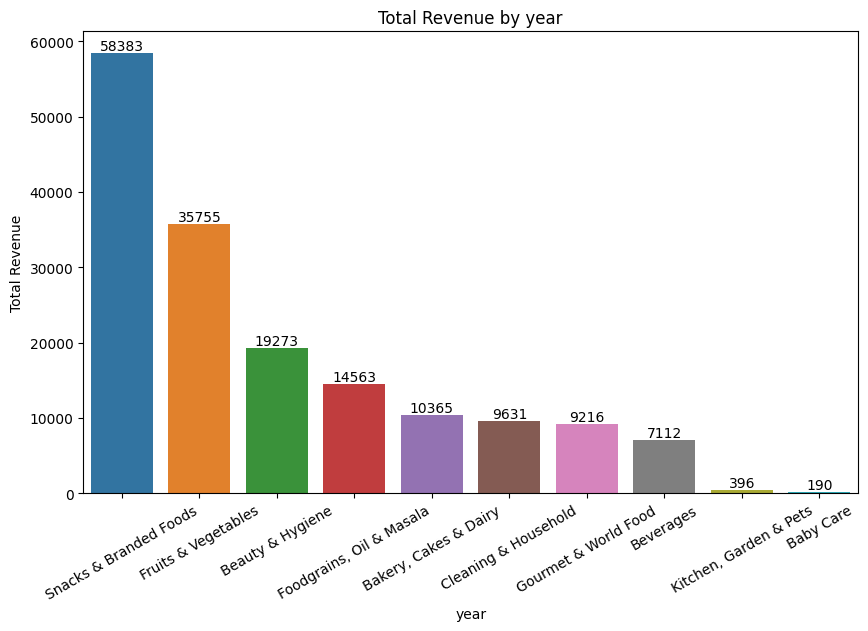

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='categoryy', y='revenue', data=category_revenue)

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set plot titles and labels
plt.title('Total Revenue by category')
plt.xlabel('category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)
plt.show()

In [ ]:
brand_revenue=product_to_stores[['revenue','brand']].groupby('brand').sum().sort_values(by='revenue', ascending=False).reset_index()
brand_revenue.head(5)

,brand,revenue
0,Fresho,35848.50
1,bb Royal,13892.77
2,Nestle,10424.71
3,Britannia,8841.10
4,Crax,6407.01
